In [158]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import rc
from matplotlib import font_manager
import pylab
from sklearn.cluster import DBSCAN, KMeans,AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.decomposition import PCA


font_name = font_manager.FontProperties(fname = "/Library/Fonts/AppleGothic.ttf").get_name()
plt.rcParams["font.family"] = font_name
plt.rcParams['axes.unicode_minus'] = False

In [206]:
data = pd.read_csv('podol_final2.csv')
data = data.drop(columns='Unnamed: 0')
data=data.fillna(0)

In [ ]:
subtotal = pd.read_csv('podol_subtotal.csv')

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager

font_name = font_manager.FontProperties(fname = "/Library/Fonts/AppleGothic.ttf").get_name()
print(font_name)

plt.rcParams["font.family"] = font_name
plt.rcParams['axes.unicode_minus'] = False

AppleGothic


In [29]:
data.columns[37:55]

Index(['ZON_Daejeon', 'ZON_Busan', 'ZON_Gyeonggi-do', 'ZON_Seoul',
       'ZON_Gyeongsangbuk-do', 'ZON_Jeollabuk-do', 'ZON_Chungcheongbuk-do',
       'ZON_Gangwon-do', 'ZON_Chungcheongnam-do', 'ZON_Incheon', 'ZON_Daegu',
       'ZON_Gwangju', 'ZON_Gyeongsangnam-do', 'ZON_Jeju-do',
       'ZON_Jeollanam-do', 'ZON_Ulsan', 'CITY_Daejeon', 'CITY_Busan'],
      dtype='object')

In [15]:
two = pd.read_csv('./직전테이블/The_last_two_months.csv', encoding='CP949')
two = two.fillna(0)


In [117]:
data.head()

,CLAC3_NM,CLAC2_NM,CLAC1_NM,NUM_PD_C,NUM_CLNT_ID,NUM_CLSE_ID,NUM_BRA_NM,TOT_HITS,TOT_PROFIT,TOT_SALES,...,CITY_Sancheong-gun,CITY_Hoengseong-gun,CITY_Cheongdo-gun,CITY_Goesan-gun,CITY_Jindo-gun,CITY_Gurye-gun,CITY_Cheongyang-gun,CITY_(not set),CITY_Gunwi-gun,CITY_Masan
0,2단우산,우산/양산류,패션잡화,23,122,129,14,15827,2531000,206,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3단우산,우산/양산류,패션잡화,247,1094,1156,31,117125,22862780,1637,...,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,BB/파운데이션/컴팩트류,메이크업,화장품/뷰티케어,2184,44162,55205,238,4340172,3529389070,69417,...,6.0,23.0,23.0,15.0,19.0,24.0,18.0,1.0,17.0,0.0
3,DIY가구,시공/DIY가구,가구,18,41,80,2,87140,309861485,1540,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,DIY완구,여아완구,완구,2,1,1,1,46,33000,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [118]:
data1 = data.groupby('CLAC2_NM').sum()

In [207]:
data2 = data.groupby('CLAC1_NM').sum()

In [208]:
zon = data2.iloc[:,34:50]

,ZON_Daejeon,ZON_Busan,ZON_Gyeonggi-do,ZON_Seoul,ZON_Gyeongsangbuk-do,ZON_Jeollabuk-do,ZON_Chungcheongbuk-do,ZON_Gangwon-do,ZON_Chungcheongnam-do,ZON_Incheon,ZON_Daegu,ZON_Gwangju,ZON_Gyeongsangnam-do,ZON_Jeju-do,ZON_Jeollanam-do,ZON_Ulsan
CLAC2_NM,,,,,,,,,,,,,,,,
TV,41.0,213.0,468.0,764.0,60.0,42.0,30.0,24.0,78.0,78.0,72.0,69.0,81.0,12.0,49.0,40.0
거실가구,116.0,774.0,1073.0,2784.0,225.0,167.0,121.0,114.0,233.0,256.0,291.0,144.0,289.0,49.0,88.0,120.0
건강보조식품,448.0,1981.0,3280.0,7916.0,563.0,1654.0,280.0,277.0,353.0,644.0,659.0,413.0,767.0,110.0,266.0,285.0
건강진액,320.0,2212.0,3091.0,6956.0,402.0,517.0,266.0,148.0,353.0,583.0,653.0,541.0,726.0,112.0,173.0,672.0
견과류,611.0,2804.0,4626.0,10887.0,844.0,841.0,507.0,470.0,671.0,1297.0,1004.0,649.0,1444.0,206.0,538.0,548.0


In [159]:
stdscaler = StandardScaler()
mmscaler = MinMaxScaler()
rbscaler = RobustScaler()

In [211]:
ZT = zondf.T

In [212]:
stdscaler.fit(ZT)
X_std = stdscaler.transform(ZT)

In [213]:
pca = PCA(n_components=5)
pca.fit(X_std)
X_pca = pca.transform(X_std)
print('원본 데이터 형태 : {}'.format(str(X_pca.shape)))
print('축소된 데이터 형태 : {}'.format(str(X_pca.shape)))

원본 데이터 형태 : (16, 5)
축소된 데이터 형태 : (16, 5)


In [214]:
for eps in [0.01,0.05,0.1,0.2,0.3,0.5,1,10,100]:
    print('\neps = {}'.format(eps))
    dbscan = DBSCAN(eps=eps,min_samples=1)
    labels=dbscan.fit_predict(X_pca)
    print('고유한 레이블 : {}'.format(np.unique(labels)))
    print('클러스터 수: {}'.format(len(np.unique(labels))))
    print('클러스터 크기: {}'.format(np.bincount(labels+1)))


eps = 0.01
고유한 레이블 : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
클러스터 수: 16
클러스터 크기: [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

eps = 0.05
고유한 레이블 : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
클러스터 수: 16
클러스터 크기: [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

eps = 0.1
고유한 레이블 : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
클러스터 수: 16
클러스터 크기: [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

eps = 0.2
고유한 레이블 : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
클러스터 수: 16
클러스터 크기: [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

eps = 0.3
고유한 레이블 : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
클러스터 수: 16
클러스터 크기: [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

eps = 0.5
고유한 레이블 : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
클러스터 수: 16
클러스터 크기: [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

eps = 1
고유한 레이블 : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
클러스터 수: 16
클러스터 크기: [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

eps = 10
고유한 레이블 : [0]
클러스터 수: 1
클러스터 크기: [ 0 16]

eps = 100
고유한 레이블 : [0]
클러스터 수: 1
클러스터 크기: [ 0 16]


In [215]:
km = KMeans(n_clusters=6,random_state=0)
labels_km = km.fit_predict(X_pca)
print('k-평균의 클러스터 크기: {}'.format(np.bincount(labels_km)))

k-평균의 클러스터 크기: [3 5 3 3 1 1]


In [216]:
ZT['labels_km'] = labels_km

In [217]:
agg = AgglomerativeClustering(n_clusters=6)
labels_agg = agg.fit_predict(X_pca)
print('병합 군집의 클러스터 크기: {}'.format(np.bincount(labels_agg)))

병합 군집의 클러스터 크기: [5 5 1 3 1 1]


In [218]:
ZT['labels_agg'] = labels_agg

In [219]:
ZT[ZT.duplicated('labels_agg')].sort_values('labels_agg')[['labels_agg','labels_km']]

CLAC1_NM,labels_agg,labels_km
ZON_Chungcheongbuk-do,0,2
ZON_Gangwon-do,0,3
ZON_Chungcheongnam-do,0,3
ZON_Gyeongsangnam-do,0,3
ZON_Busan,1,1
ZON_Gyeonggi-do,1,1
ZON_Incheon,1,1
ZON_Daegu,1,2
ZON_Gwangju,3,0
ZON_Jeollanam-do,3,0


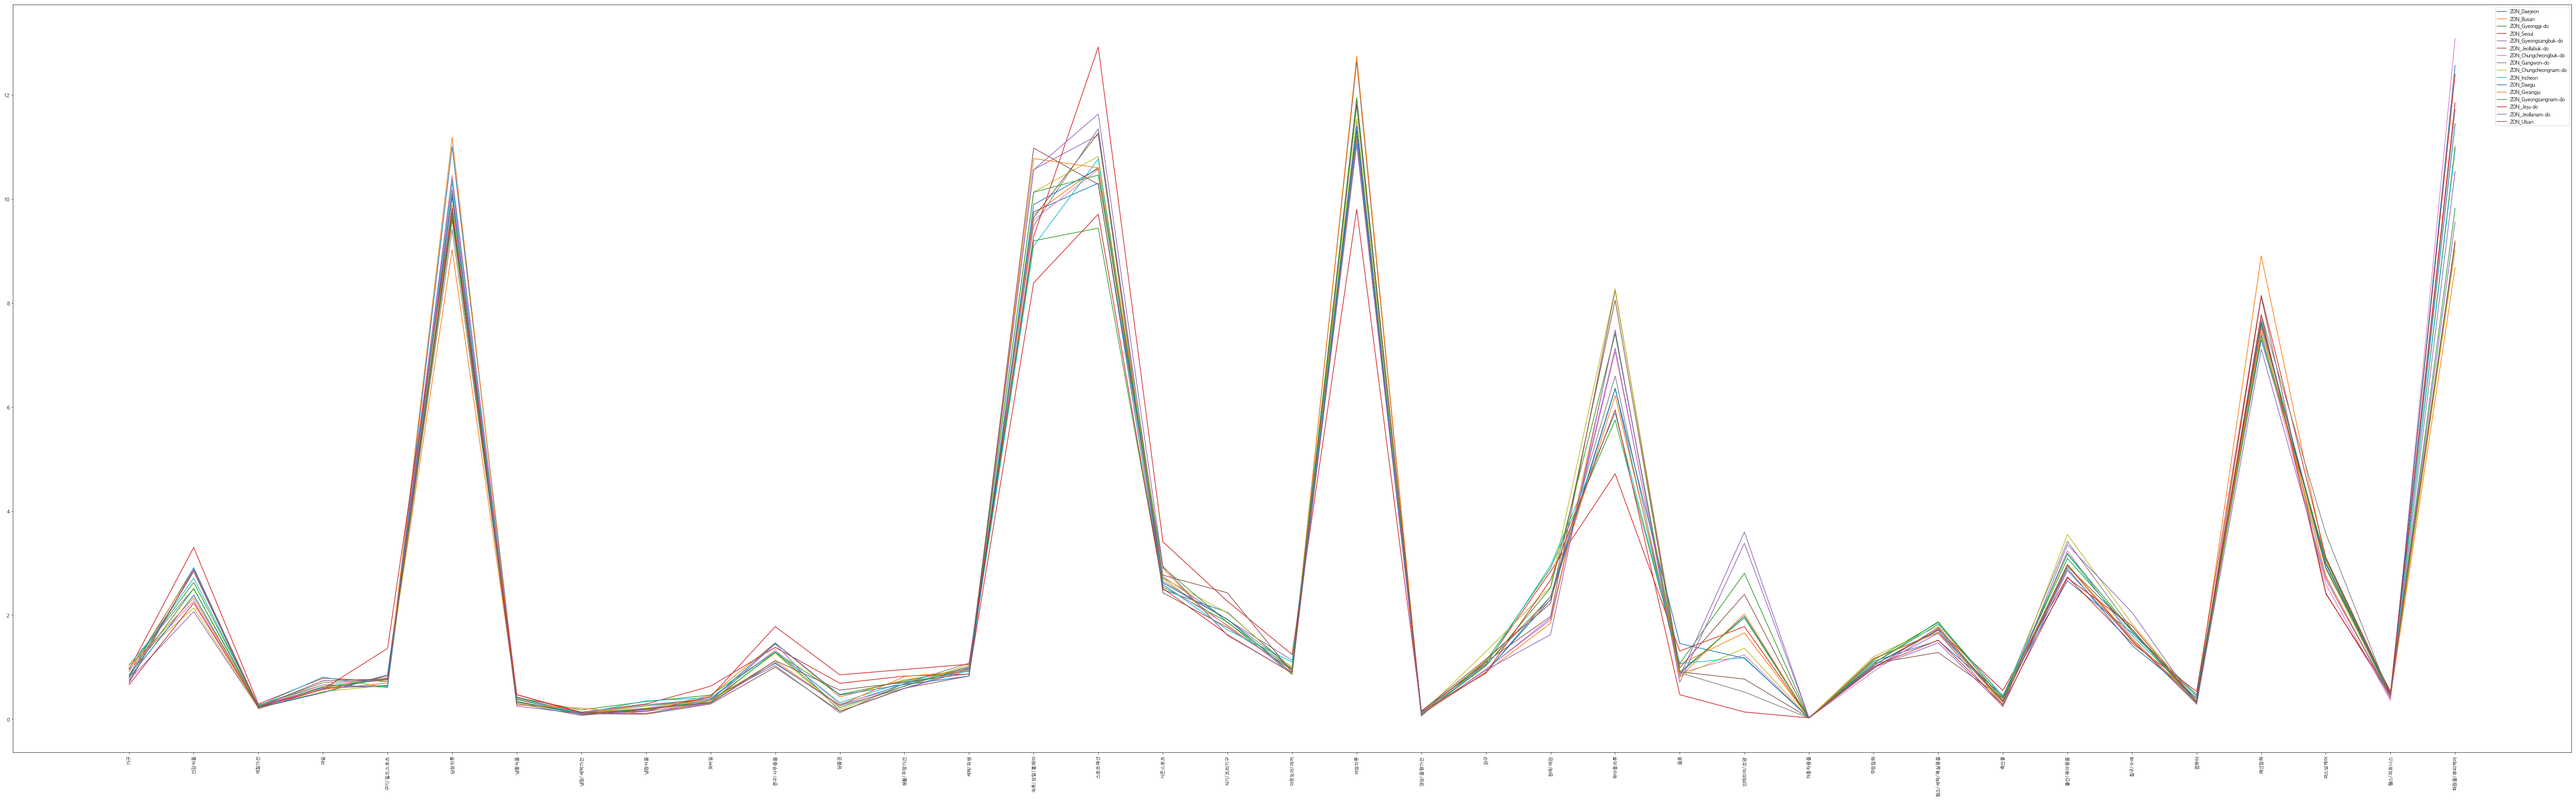

In [226]:
plt.subplots(1,1, figsize=(100,30), sharex=True)

X = range(len(zondf))
plt.plot(X,zondf)
plt.legend(zondf.columns)
ticks = plt.xticks(range(len(zondf)), np.asarray(zondf.index), rotation =90)



In [222]:
zon.head()

,ZON_Daejeon,ZON_Busan,ZON_Gyeonggi-do,ZON_Seoul,ZON_Gyeongsangbuk-do,ZON_Jeollabuk-do,ZON_Chungcheongbuk-do,ZON_Gangwon-do,ZON_Chungcheongnam-do,ZON_Incheon,ZON_Daegu,ZON_Gwangju,ZON_Gyeongsangnam-do,ZON_Jeju-do,ZON_Jeollanam-do,ZON_Ulsan
CLAC1_NM,,,,,,,,,,,,,,,,
가구,1128.0,5852.0,10106.0,20642.0,1570.0,1294.0,941.0,974.0,1802.0,2117.0,2014.0,1558.0,2404.0,304.0,798.0,808.0
건강식품,3894.0,18506.0,27318.0,71446.0,4303.0,5129.0,2266.0,2339.0,3733.0,5922.0,6063.0,3661.0,7223.0,1027.0,3293.0,2855.0
계절가전,325.0,1643.0,2811.0,6236.0,442.0,354.0,237.0,241.0,382.0,552.0,577.0,385.0,643.0,107.0,283.0,230.0
과일,809.0,3841.0,6823.0,17011.0,1055.0,1025.0,652.0,651.0,923.0,1764.0,1296.0,888.0,1790.0,263.0,682.0,740.0
구기/필드스포츠,842.0,5225.0,6367.0,15635.0,1751.0,1401.0,773.0,713.0,1132.0,1322.0,2161.0,1091.0,2180.0,625.0,745.0,776.0


In [209]:
zonsum=zon.sum(axis=0)

In [210]:
zondf = zon*100/zonsum

In [157]:
zon.loc['커튼/블라인드류']

ZON_Daejeon               2648.0
ZON_Busan                10674.0
ZON_Gyeonggi-do          29156.0
ZON_Seoul                38463.0
ZON_Gyeongsangbuk-do      7490.0
ZON_Jeollabuk-do          4280.0
ZON_Chungcheongbuk-do     1230.0
ZON_Gangwon-do             484.0
ZON_Chungcheongnam-do     2381.0
ZON_Incheon               2578.0
ZON_Daegu                 2972.0
ZON_Gwangju               3173.0
ZON_Gyeongsangnam-do      5598.0
ZON_Jeju-do                 62.0
ZON_Jeollanam-do          3876.0
ZON_Ulsan                  773.0
Name: 커튼/블라인드류, dtype: float64

In [156]:
zondf.loc['커튼/블라인드류']

ZON_Daejeon              1.976990
ZON_Busan                1.657080
ZON_Gyeonggi-do          2.802955
ZON_Seoul                1.776113
ZON_Gyeongsangbuk-do     3.594792
ZON_Jeollabuk-do         2.397289
ZON_Chungcheongbuk-do    1.232712
ZON_Gangwon-do           0.518718
ZON_Chungcheongnam-do    1.360494
ZON_Incheon              1.179420
ZON_Daegu                1.167716
ZON_Gwangju              2.018795
ZON_Gyeongsangnam-do     1.944020
ZON_Jeju-do              0.134689
ZON_Jeollanam-do         3.378131
ZON_Ulsan                0.767970
Name: 커튼/블라인드류, dtype: float64

## 수도권

In [127]:
sudo = zon[['ZON_Seoul','ZON_Gyeonggi-do','ZON_Incheon']]

In [128]:
sudosum = sudo.sum(axis=0)

In [89]:
sudosum[1]

1040188.0

In [131]:
sudodf = sudo*100/sudosum

In [132]:
sudodf.head()

,ZON_Seoul,ZON_Gyeonggi-do,ZON_Incheon
CLAC2_NM,,,
TV,0.035279,0.044992,0.035685
거실가구,0.128557,0.103154,0.117119
건강보조식품,0.365539,0.315328,0.294626
건강진액,0.321208,0.297158,0.266719
견과류,0.502731,0.444727,0.593370


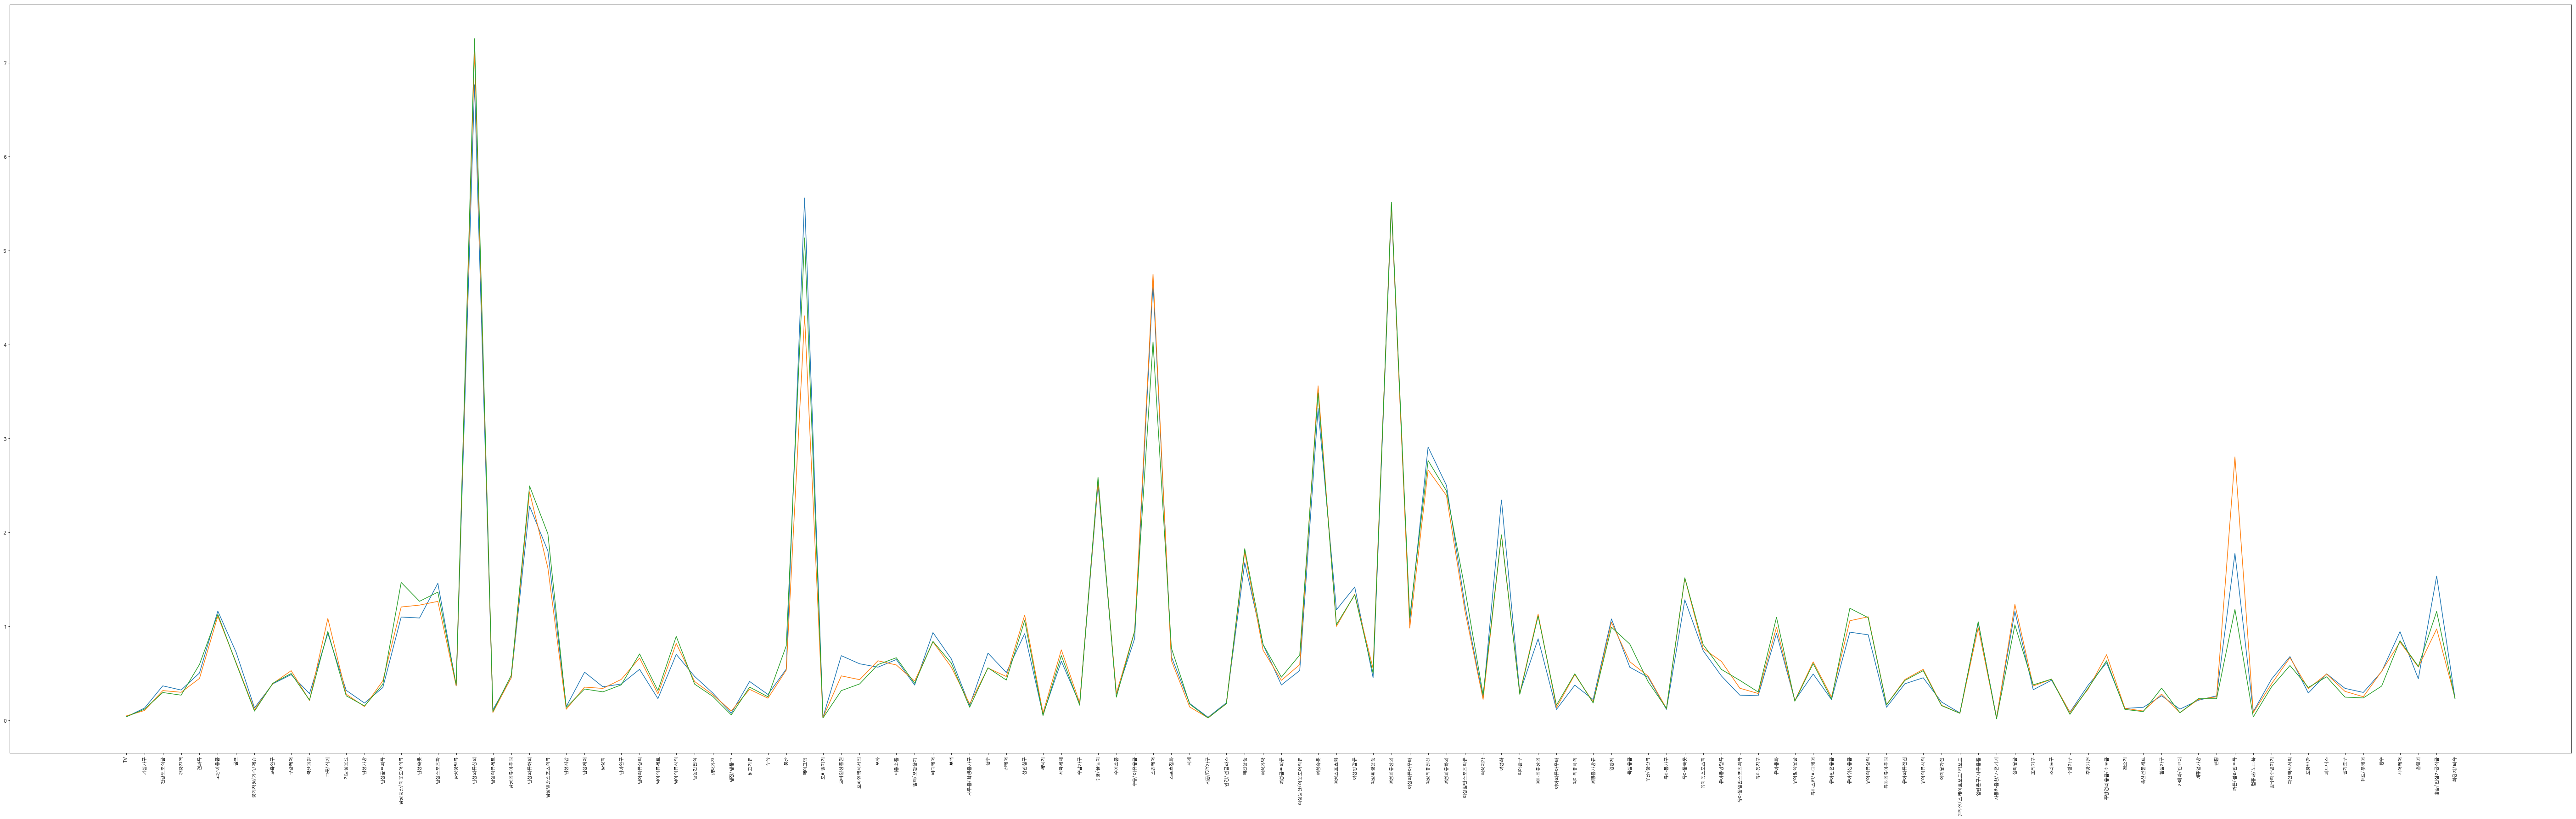

In [133]:
plt.subplots(1,1, figsize=(100,30), sharex=True)

X = range(len(sudodf))
plt.plot(X,sudodf)
ticks = plt.xticks(range(len(sudodf)), np.asarray(sudodf.index), rotation =90)



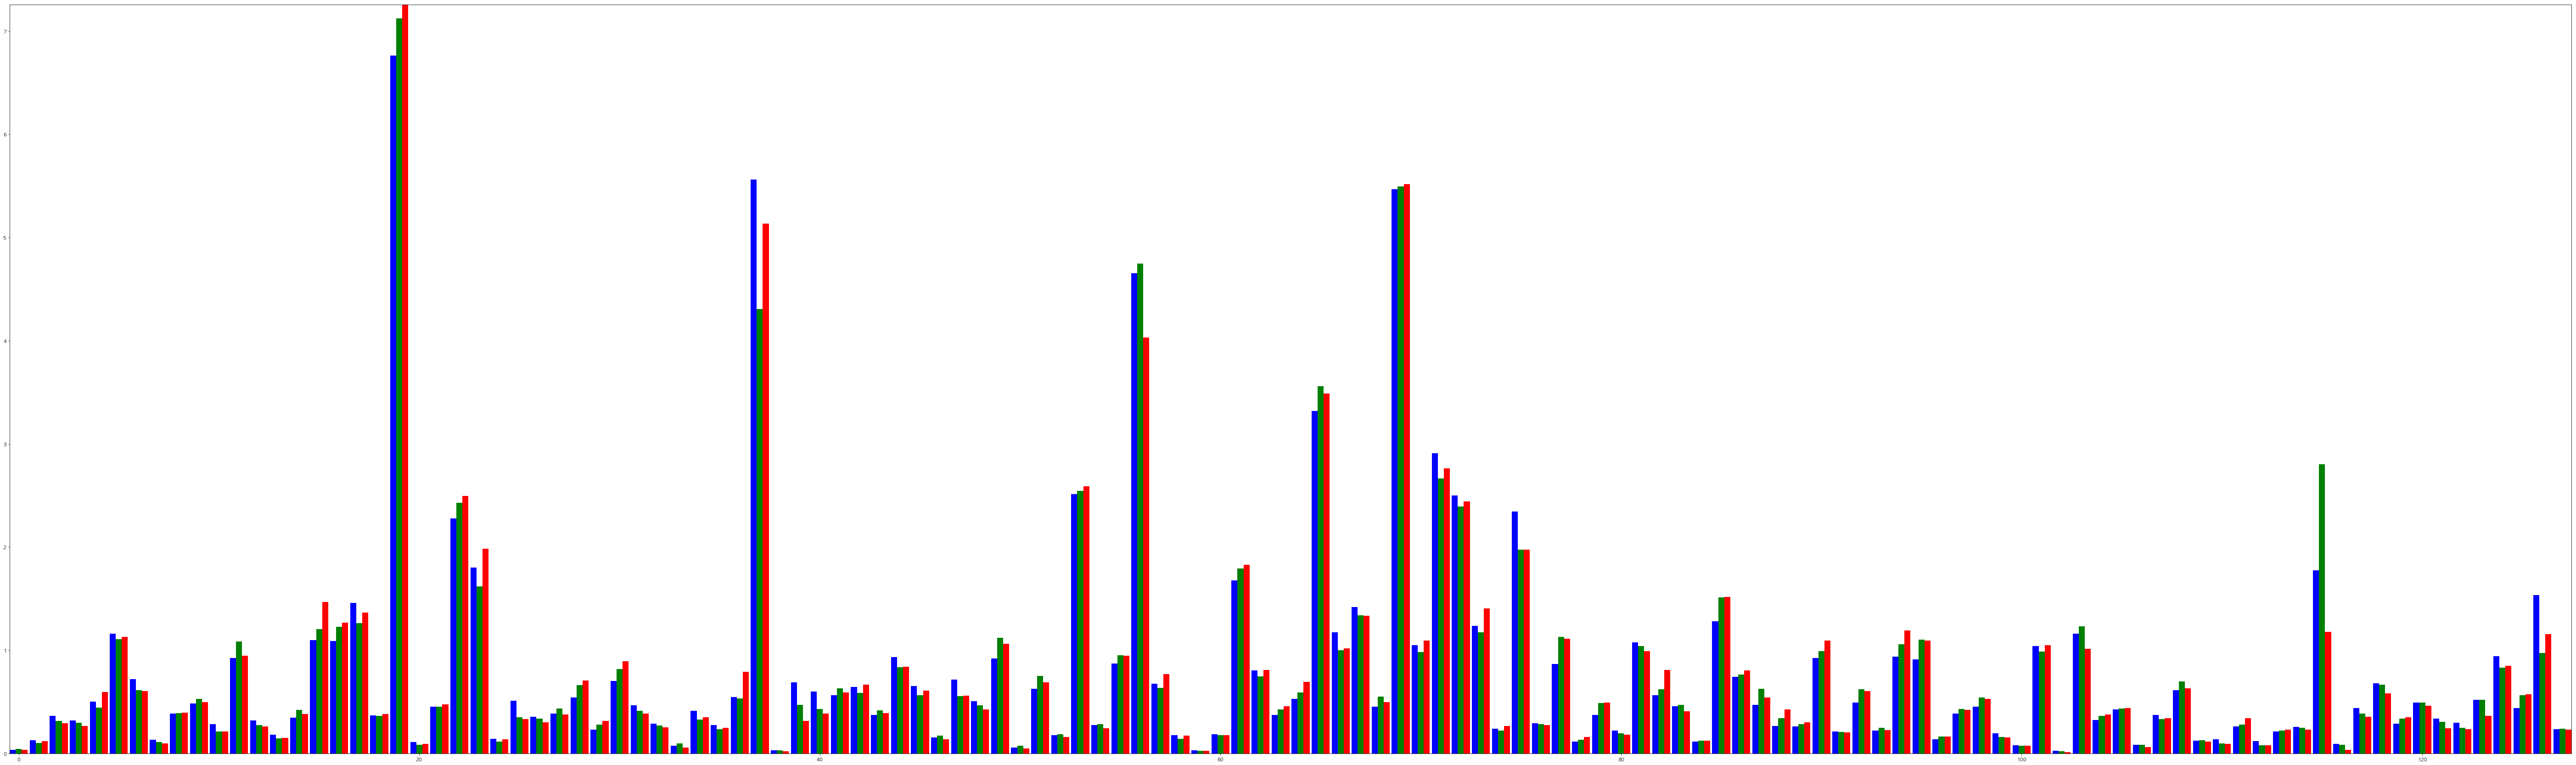

In [220]:
X = np.arange(len(sudodf))

plt.figure(figsize=(100,30))
ax = plt.subplot(111)

w = 0.3
ax.bar(X-w, sudodf['ZON_Seoul'], width=w, color='b')
ax.bar(X, sudodf['ZON_Gyeonggi-do'], width=w,color='g')
ax.bar(X+w, sudodf['ZON_Incheon'], width=w,color='r')
#,align='center'
ax.autoscale(tight=True)

plt.show()

In [152]:
sudodf

,ZON_Seoul,ZON_Gyeonggi-do,ZON_Incheon
CLAC2_NM,,,
TV,0.035279,0.044992,0.035685
거실가구,0.128557,0.103154,0.117119
건강보조식품,0.365539,0.315328,0.294626
건강진액,0.321208,0.297158,0.266719
견과류,0.502731,0.444727,0.593370
고양이용품,1.161818,1.107684,1.127266
골프,0.721980,0.612101,0.604807
공기청정/가습/제습,0.132021,0.111903,0.096989
교육완구,0.386826,0.390314,0.393445


## 전라도

'ZON_Daejeon', 'ZON_Busan', 'ZON_Gyeonggi-do', 'ZON_Seoul',
       'ZON_Gyeongsangbuk-do', 'ZON_Jeollabuk-do', 'ZON_Chungcheongbuk-do',
       'ZON_Gangwon-do', 'ZON_Chungcheongnam-do', 'ZON_Incheon', 'ZON_Daegu',
       'ZON_Gwangju', 'ZON_Gyeongsangnam-do', 'ZON_Jeju-do',
       'ZON_Jeollanam-do', 'ZON_Ulsan', 'CITY_Daejeon', 'CITY_Busan'],

In [136]:
jeonla = zon[['ZON_Jeollabuk-do','ZON_Jeollanam-do','ZON_Gwangju']]
jeonlasum = jeonla.sum(axis=0)
jeonladf = jeonla*100/jeonlasum

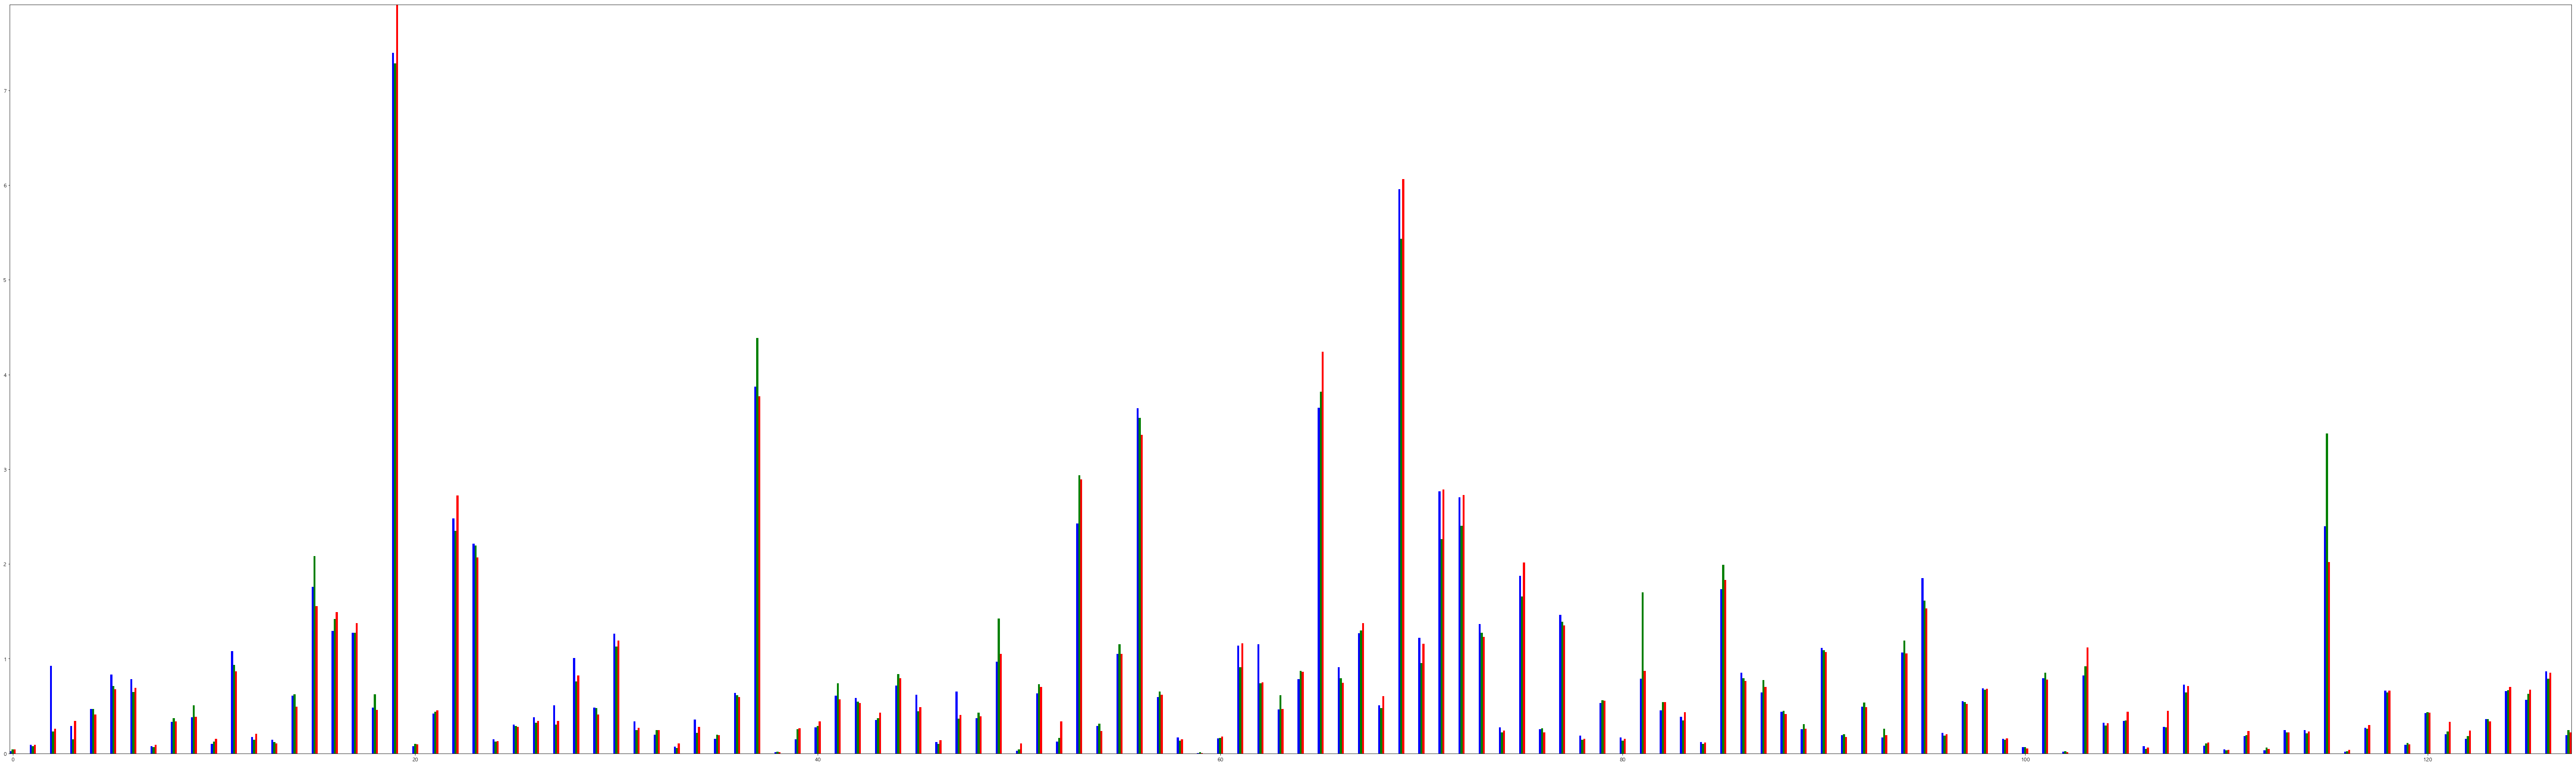

In [137]:
X = np.arange(len(jeonladf))

plt.figure(figsize=(100,30))
ax = plt.subplot()

w = 0.1
ax.bar(X-w, jeonladf['ZON_Jeollabuk-do'], width=w, color='b')
ax.bar(X, jeonladf['ZON_Jeollanam-do'], width=w,color='g')
ax.bar(X+w, jeonladf['ZON_Gwangju'], width=w,color='r')
#,align='center'
ax.autoscale(tight=True)

plt.show()

## 경상남도

In [139]:
gsangnam = zon[[ 'ZON_Busan','ZON_Ulsan','ZON_Gyeongsangnam-do']]
gsangnamsum = gsangnam.sum(axis=0)
gsangnamdf = gsangnam*100/gsangnamsum

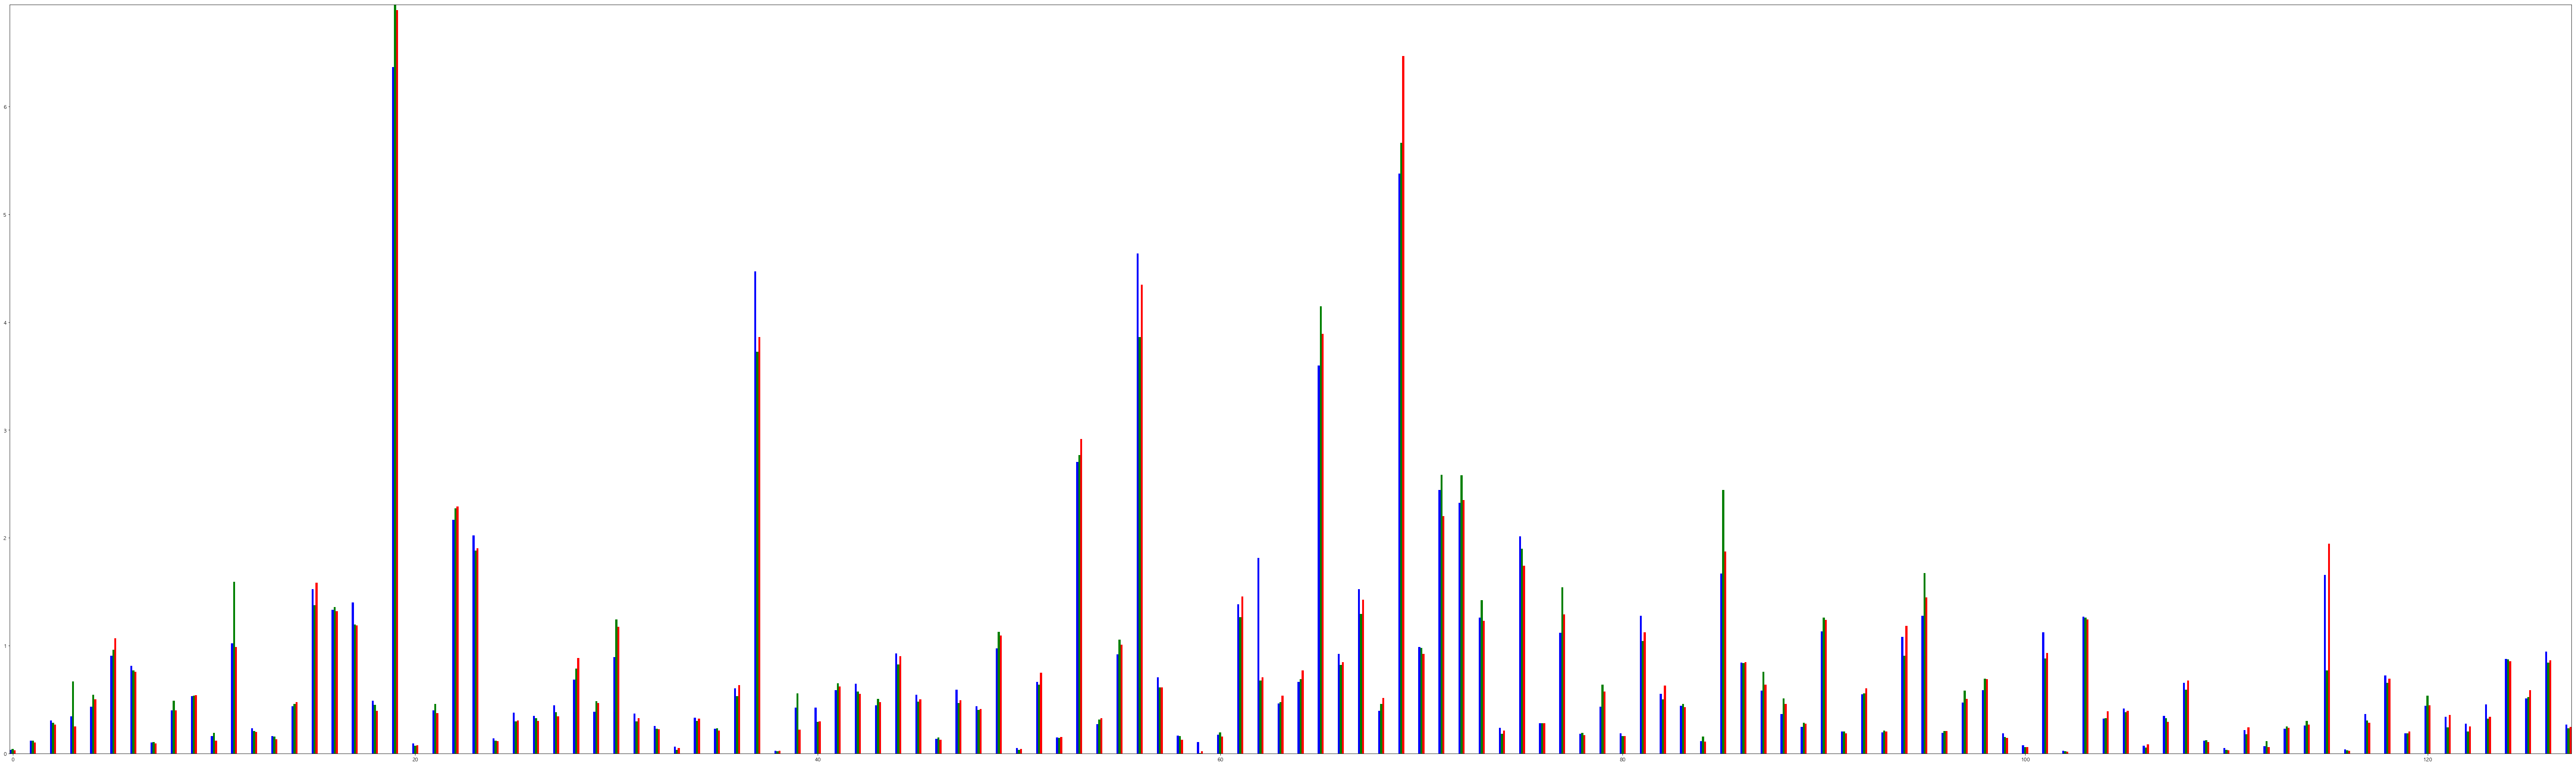

In [140]:
X = np.arange(len(gsangnamdf))

plt.figure(figsize=(100,30))
ax = plt.subplot()

w = 0.1
ax.bar(X-w, gsangnamdf['ZON_Busan'], width=w, color='b')
ax.bar(X, gsangnamdf['ZON_Ulsan'], width=w,color='g')
ax.bar(X+w, gsangnamdf['ZON_Gyeongsangnam-do'], width=w,color='r')
#,align='center'
ax.autoscale(tight=True)

plt.show()

## 경상북도

'ZON_Daejeon', 'ZON_Busan', 'ZON_Gyeonggi-do', 'ZON_Seoul',
       'ZON_Gyeongsangbuk-do', 'ZON_Jeollabuk-do', 'ZON_Chungcheongbuk-do',
       'ZON_Gangwon-do', 'ZON_Chungcheongnam-do', 'ZON_Incheon', 'ZON_Daegu',
       'ZON_Gwangju', 'ZON_Gyeongsangnam-do', 'ZON_Jeju-do',
       'ZON_Jeollanam-do', 'ZON_Ulsan', 'CITY_Daejeon', 'CITY_Busan'],

In [141]:
gsangbuk = zon[['ZON_Daegu','ZON_Gyeongsangbuk-do']]
gsangbuksum = gsangbuk.sum(axis=0)
gsangbukdf = gsangbuk*100/gsangbuksum

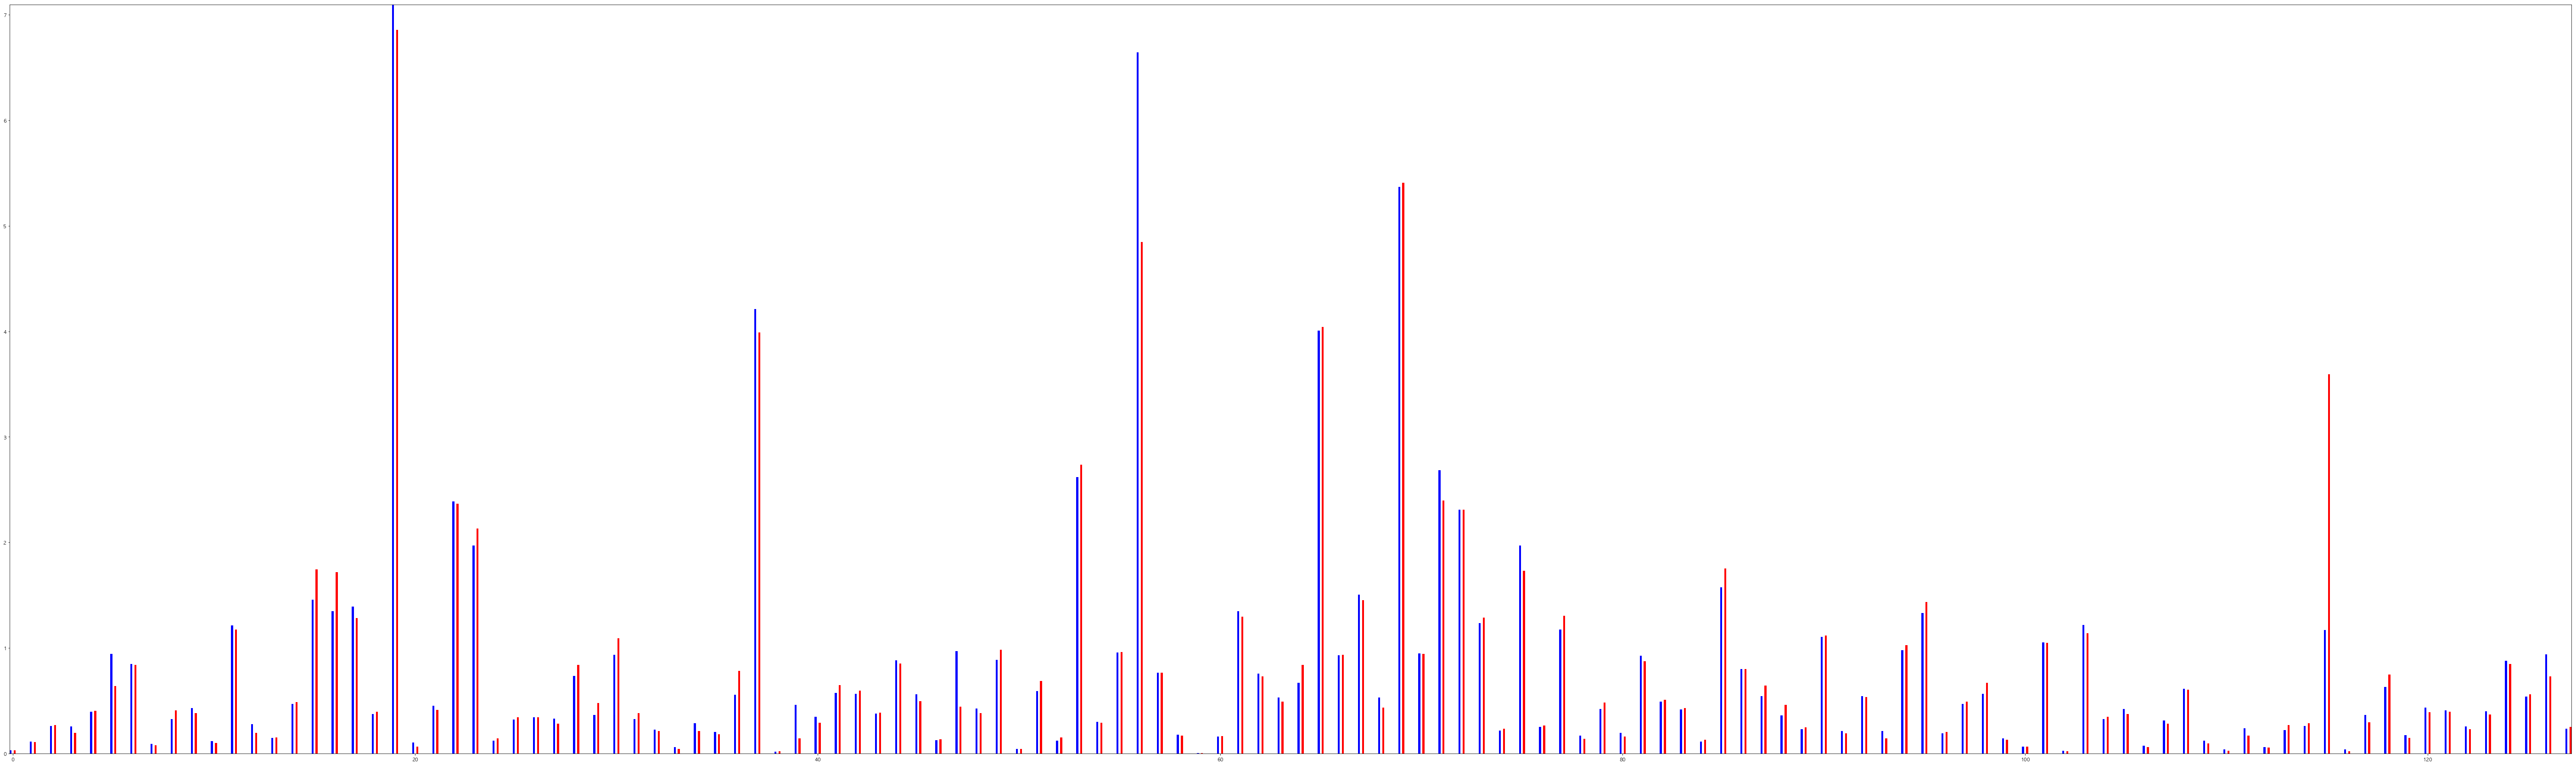

In [142]:
X = np.arange(len(gsangbukdf))

plt.figure(figsize=(100,30))
ax = plt.subplot()

w = 0.1
ax.bar(X-w, gsangbukdf['ZON_Daegu'], width=w, color='b')
ax.bar(X+w, gsangbukdf['ZON_Gyeongsangbuk-do'], width=w,color='r')
#,align='center'
ax.autoscale(tight=True)

plt.show()

## 충청도

In [146]:
chung = zon[['ZON_Daejeon','ZON_Chungcheongbuk-do','ZON_Chungcheongnam-do']]
chungsum = chung.sum(axis=0)
chungdf = chung*100/chungsum

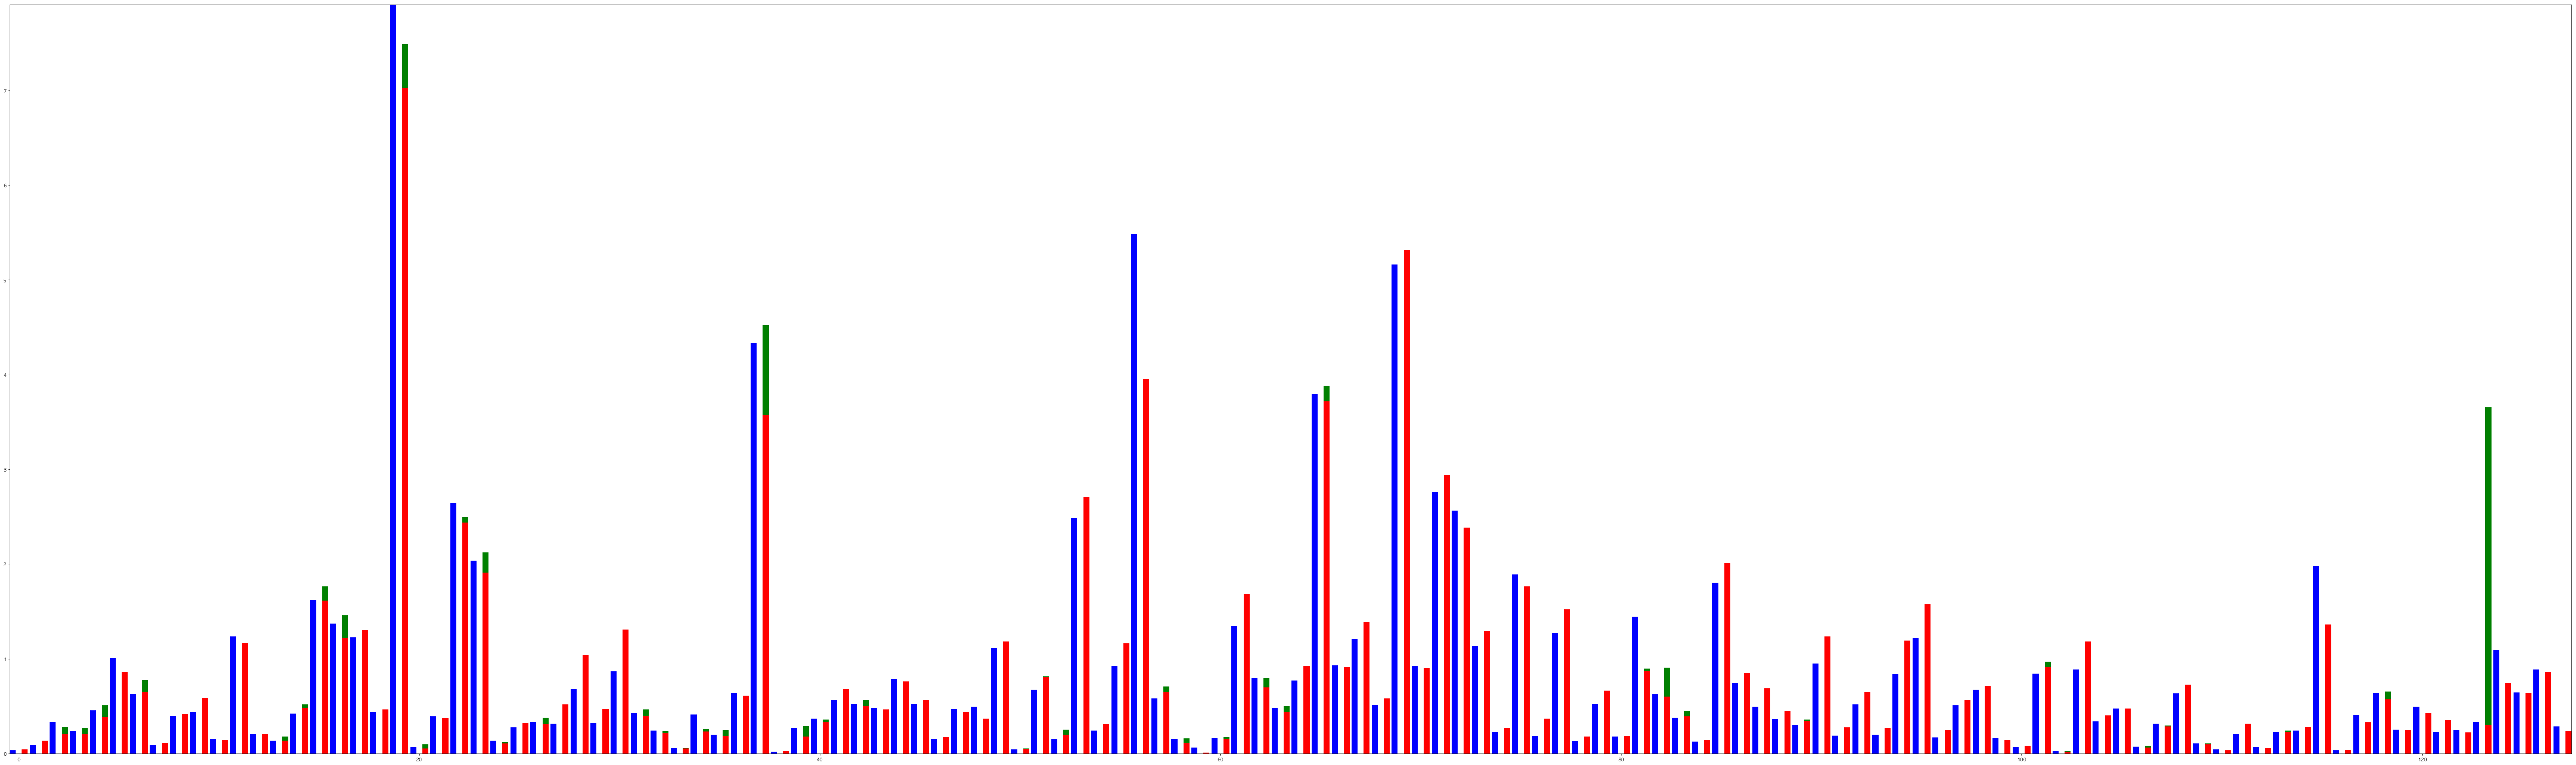

In [151]:
X = np.arange(len(chungdf))

plt.figure(figsize=(100,30))
ax = plt.subplot()

w = 0.3
ax.bar(X-w, chungdf['ZON_Daejeon'], width=w, color='b')
ax.bar(X+w, chungdf['ZON_Chungcheongbuk-do'], width=w,color='g')
ax.bar(X+w, chungdf['ZON_Chungcheongnam-do'], width=w,color='r')
#,align='center'
ax.autoscale(tight=True)

plt.show()

## 강원도

In [148]:
gangwon = zon[['ZON_Gangwon-do']]
gangwonsum = gangwon.sum(axis=0)
gangwondf = gangwon*100/gangwonsum

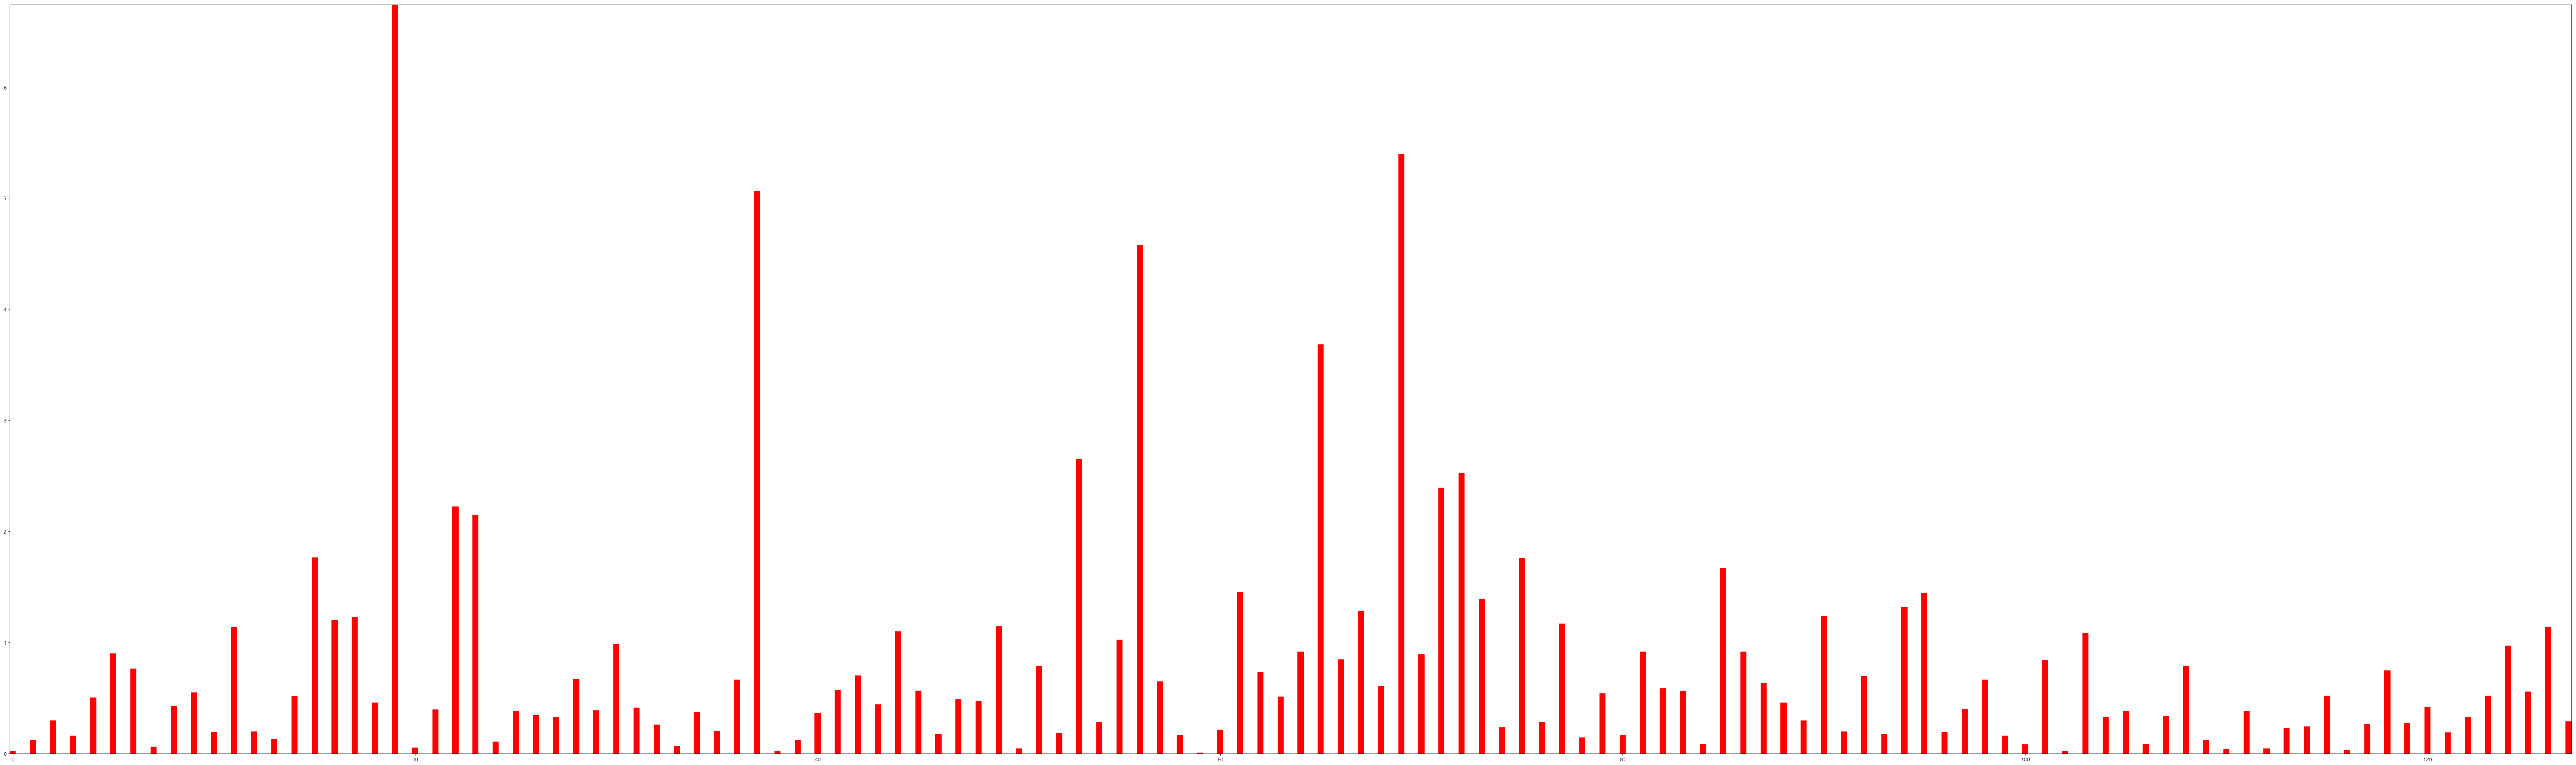

In [150]:
X = np.arange(len(gangwondf))

plt.figure(figsize=(100,30))
ax = plt.subplot()

w = 0.3

ax.bar(X, gangwondf['ZON_Gangwon-do'], width=w,color='r')
#,align='center'
ax.autoscale(tight=True)

plt.show()

## 제주도

In [ ]:
gangwon = zon[['ZON_Gangwon-do']]
gangwonsum = gangwon.sum(axis=0)
gangwondf = gangwon*100/gangwonsum

In [63]:
fig, axes = plt.subplots(len(year2),1, figsize=(20,500), sharex=True)
ax = axes.ravel()
X = range(len(year2.columns))

for i in range(len(year2)):
    
    ax[i].plot(X,zon)
    ax[i].set_ylabel('%s 클릭량'%(year2.T.columns[i]))
    [ax[i].axvline(m,  color='r') for m in monthday]
    #ax[i].axvline(x = monthday,color='r')
    plt.xticks(range(len(year2.columns)), np.asarray(year2.columns), rotation =90)
    #ax[i].set_xticklabels(np.asarray(month1.index),rotation =90,minor=False)
pylab.savefig('네이버 중분류 분야별 클릭량.png')

,ZON_Busan,ZON_Gyeonggi-do,ZON_Seoul,ZON_Gyeongsangbuk-do,ZON_Jeollabuk-do,ZON_Chungcheongbuk-do,ZON_Gangwon-do,ZON_Chungcheongnam-do,ZON_Incheon,ZON_Daegu,ZON_Gwangju,ZON_Gyeongsangnam-do,ZON_Jeju-do,ZON_Jeollanam-do,ZON_Ulsan,CITY_Daejeon
CLAC3_NM,,,,,,,,,,,,,,,,
2단우산,16.0,56.0,72.0,9.0,2.0,5.0,2.0,1.0,9.0,7.0,4.0,12.0,0.0,1.0,6.0,4.0
3단우산,184.0,293.0,654.0,40.0,36.0,35.0,31.0,33.0,38.0,74.0,30.0,74.0,6.0,25.0,43.0,41.0
BB/파운데이션/컴팩트류,6960.0,11329.0,29376.0,2035.0,1728.0,1142.0,1164.0,1524.0,2691.0,2509.0,1518.0,2860.0,1034.0,1267.0,833.0,1447.0
DIY가구,641.0,192.0,514.0,0.0,0.0,0.0,0.0,0.0,44.0,0.0,0.0,53.0,0.0,16.0,0.0,80.0
DIY완구,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
import itertools
def findsubsets(S,m):
    return set(itertools.combinations(S, m))


In [42]:
from itertools import chain, combinations
def powerset(iterable):
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))

In [43]:
list(powerset("abcd"))

[(),
 ('a',),
 ('b',),
 ('c',),
 ('d',),
 ('a', 'b'),
 ('a', 'c'),
 ('a', 'd'),
 ('b', 'c'),
 ('b', 'd'),
 ('c', 'd'),
 ('a', 'b', 'c'),
 ('a', 'b', 'd'),
 ('a', 'c', 'd'),
 ('b', 'c', 'd'),
 ('a', 'b', 'c', 'd')]

In [3]:
ind=list(range(0,3))+list(range(31,37))

In [7]:
month = data.iloc[:,ind]

In [5]:
month.reset_index(inplace=True)


,CLAC3_NM,CLAC2_NM,CLAC1_NM,April,May,June,July,August,September
0,2단우산,우산/양산류,패션잡화,66.0,44.0,46.0,30.0,16.0,4.0
1,3단우산,우산/양산류,패션잡화,442.0,364.0,267.0,247.0,196.0,121.0
2,BB/파운데이션/컴팩트류,메이크업,화장품/뷰티케어,11386.0,13304.0,12012.0,11251.0,11471.0,9993.0
3,DIY가구,시공/DIY가구,가구,61.0,406.0,550.0,214.0,166.0,143.0
4,DIY완구,여아완구,완구,0.0,0.0,0.0,0.0,0.0,2.0


In [9]:
model = pd.read_csv('The_last_two_months.csv')

FileNotFoundError: File b'The_last_two_months.csv' does not exist